In [1]:
from __future__ import print_function
import keras
from keras.models import Sequential
from keras.layers import Dense,Flatten
from keras.layers import Conv2D,MaxPooling2D
from keras.datasets import mnist
import matplotlib.pyplot as plt

Using TensorFlow backend.


In [2]:
# 参数设置
batch_size=128
n_classes=10
n_epochs=10

# 图片维度
img_x,img_y=28,28

In [3]:
# 加载MNIST数据集
(x_train,y_train),(x_test,y_test)=mnist.load_data()
# reshape the data into a 4D tensor - (sample_number, x_img_size, y_img_size, num_channels)
# because the MNIST is greyscale, we only have a single channel - RGB colour images would have 3
x_train = x_train.reshape(x_train.shape[0], img_x, img_y, 1)
x_test = x_test.reshape(x_test.shape[0], img_x, img_y, 1)
input_shape = (img_x, img_y, 1)

x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255
print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

x_train shape: (60000, 28, 28, 1)
60000 train samples
10000 test samples


Instructions for updating:
keep_dims is deprecated, use keepdims instead
Instructions for updating:
keep_dims is deprecated, use keepdims instead
Instructions for updating:
keep_dims is deprecated, use keepdims instead
Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 113s - loss: 0.1489 - acc: 0.9550 - val_loss: 0.0544 - val_acc: 0.9823
Epoch 2/10
60000/60000 [==============================] - 107s - loss: 0.0434 - acc: 0.9864 - val_loss: 0.0349 - val_acc: 0.9887
Epoch 3/10
60000/60000 [==============================] - 111s - loss: 0.0288 - acc: 0.9910 - val_loss: 0.0282 - val_acc: 0.9905
Epoch 4/10
60000/60000 [==============================] - 110s - loss: 0.0202 - acc: 0.9936 - val_loss: 0.0274 - val_acc: 0.9912
Epoch 5/10
60000/60000 [==============================] - 110s - loss: 0.0171 - acc: 0.9942 - val_loss: 0.0273 - val_acc: 0.9911
Epoch 6/10
60000/60000 [==============================] - 108s - loss: 0.0131 - acc: 0

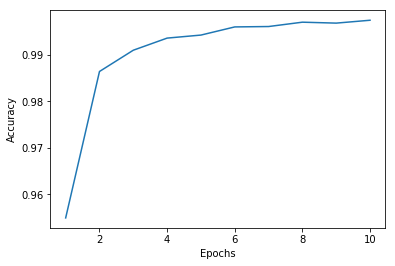

In [4]:
#  convert class vectors to binary class matrices - this is for use in the
# categorical_crossentropy loss below
y_train = keras.utils.to_categorical(y_train, n_classes)
y_test = keras.utils.to_categorical(y_test, n_classes)

model = Sequential()
model.add(Conv2D(32, kernel_size=(5, 5), strides=(1, 1),
                 activation='relu',
                 input_shape=input_shape))
model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))
model.add(Conv2D(64, (5, 5), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(1000, activation='relu'))
model.add(Dense(n_classes, activation='softmax'))

model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adam(),
              metrics=['accuracy'])


class AccuracyHistory(keras.callbacks.Callback):
    def on_train_begin(self, logs={}):
        self.acc = []

    def on_epoch_end(self, batch, logs={}):
        self.acc.append(logs.get('acc'))

history = AccuracyHistory()

model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=n_epochs,
          verbose=1,
          validation_data=(x_test, y_test),
          callbacks=[history])
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])
plt.plot(range(1, 11), history.acc)
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.show()